<a href="https://colab.research.google.com/github/Hamza1407/AnalyseTemp/blob/main/Clustering_Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clustering des clients selon le comportement journalier de leurs consommations.**

Le but de ce Notebook est de segmenter les clients de l'entreprise Opale en fonction de leur comportement pendant différentes périodes de la journée.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

warnings.filterwarnings(action="ignore")


Le données qui nous servent de suport ici correspondent à la répartition (en %) de la consommation de chaque client sur 24 heures.

In [40]:
df=pd.read_csv('/content/Join_30_min.csv')
df=df.drop(columns=['Unnamed: 0','Jour semaine','Jour','Mois','Année'])

df_mean = df.groupby('Heure').mean()


df_percentage = df_mean.div(df_mean.sum(axis=0), axis=1) * 100

df_percentage_transposed = df_percentage.transpose()

df_percentage_transposed.reset_index(inplace=True)

df_percentage_transposed

Heure,index,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,AMTE4,2.707809,2.043516,1.797971,1.818637,1.811014,1.983621,2.761714,6.931511,6.979427,...,6.875972,6.626045,6.165396,3.387347,2.620144,2.446448,1.742951,1.712459,1.708103,2.378385
1,AMTE3,2.256452,2.235215,2.244836,2.277054,2.381522,3.887349,4.597987,5.602772,5.879867,...,5.630161,5.252985,4.849827,4.630219,4.408563,4.332635,3.837298,2.523559,2.360683,2.267010
2,AMTE2,2.387464,2.294753,2.871002,3.698465,3.918638,4.164121,4.120506,4.441659,5.481198,...,5.464473,5.278456,4.720740,4.337352,3.926368,3.715171,3.392996,2.780720,2.457783,2.421063
3,Indus8,2.463856,2.482252,2.469625,2.492523,2.461890,4.080411,3.629753,8.504310,11.459374,...,4.850233,6.068519,4.016565,2.136629,2.059957,1.985971,2.272700,2.504992,2.528154,2.489880
4,AMTE1,3.934557,3.849169,3.721061,3.711561,3.805582,4.066210,4.094938,4.441847,4.543533,...,4.418503,4.368739,4.231255,4.102578,4.098932,4.066880,4.070353,4.003224,3.980872,3.969312
5,Indus4-1,1.920198,1.275456,0.536680,0.510194,0.545672,1.916048,4.548204,5.358705,5.503715,...,5.974223,5.773161,6.216023,6.470039,5.847565,5.899760,5.685898,2.895406,2.587969,2.500647
6,Indus4-2,2.049508,1.315528,0.598871,0.560946,0.580043,1.485669,3.806941,5.599154,5.526410,...,6.098293,5.983708,6.536031,6.688348,6.007609,5.136647,4.848217,3.324237,2.778628,2.637190
7,College1-1,3.333041,3.319653,3.305207,3.315223,3.328322,3.322639,3.612938,3.737186,3.746047,...,5.251045,5.200141,5.083454,4.911962,4.644105,4.359489,4.135456,3.807979,3.526060,3.362996
8,Private2,2.946085,2.301049,8.556752,6.090538,4.724778,4.851985,4.536531,3.766072,3.164449,...,8.161397,5.487796,4.449998,2.755593,3.081587,3.966099,3.403017,2.936412,2.320511,3.189978
9,College1-2,3.325319,3.434649,3.492407,3.614287,3.676185,3.644563,4.507767,4.545780,4.542753,...,4.504319,4.277669,4.203493,4.148912,4.265391,4.064559,3.982646,4.012754,3.848758,3.316405


On peut interpréter le DataFrame mentionné de la manière suivante :
- Le client AMTE 4 représente une puissance équivalente à 2.7% du total de la puissance sur la journée à l'heure 0,  2.04% à l'heure 1, et ainsi de suite.

### **Entraînement du modèle**

In [41]:
X=df_percentage_transposed.drop(columns='index')
scaler = MinMaxScaler()


for x in X.columns:
    col_to_normalize=X[x]
    col_to_normalize = col_to_normalize.values.reshape(-1, 1)

    col_to_normalize = scaler.fit_transform(col_to_normalize)
    X[x] = col_to_normalize

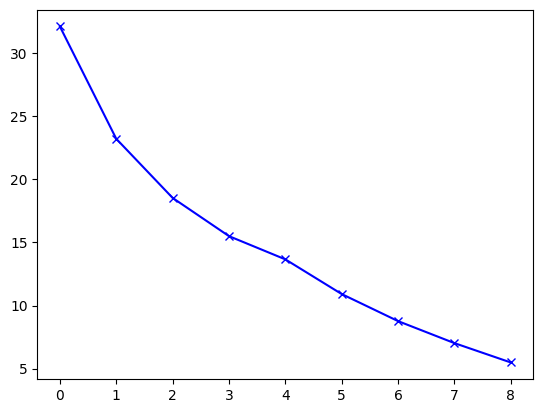

In [42]:
n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)

plt.plot(cost, 'bx-')

In [43]:
kmean= KMeans(2)
kmean.fit(X)
labels=kmean.labels_

In [44]:
clusters=pd.concat([df_percentage_transposed, pd.DataFrame({'cluster':labels})], axis=1)
clusters

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,cluster
0,AMTE4,2.707809,2.043516,1.797971,1.818637,1.811014,1.983621,2.761714,6.931511,6.979427,...,6.626045,6.165396,3.387347,2.620144,2.446448,1.742951,1.712459,1.708103,2.378385,1
1,AMTE3,2.256452,2.235215,2.244836,2.277054,2.381522,3.887349,4.597987,5.602772,5.879867,...,5.252985,4.849827,4.630219,4.408563,4.332635,3.837298,2.523559,2.360683,2.267010,1
2,AMTE2,2.387464,2.294753,2.871002,3.698465,3.918638,4.164121,4.120506,4.441659,5.481198,...,5.278456,4.720740,4.337352,3.926368,3.715171,3.392996,2.780720,2.457783,2.421063,1
3,Indus8,2.463856,2.482252,2.469625,2.492523,2.461890,4.080411,3.629753,8.504310,11.459374,...,6.068519,4.016565,2.136629,2.059957,1.985971,2.272700,2.504992,2.528154,2.489880,1
4,AMTE1,3.934557,3.849169,3.721061,3.711561,3.805582,4.066210,4.094938,4.441847,4.543533,...,4.368739,4.231255,4.102578,4.098932,4.066880,4.070353,4.003224,3.980872,3.969312,0
5,Indus4-1,1.920198,1.275456,0.536680,0.510194,0.545672,1.916048,4.548204,5.358705,5.503715,...,5.773161,6.216023,6.470039,5.847565,5.899760,5.685898,2.895406,2.587969,2.500647,1
6,Indus4-2,2.049508,1.315528,0.598871,0.560946,0.580043,1.485669,3.806941,5.599154,5.526410,...,5.983708,6.536031,6.688348,6.007609,5.136647,4.848217,3.324237,2.778628,2.637190,1
7,College1-1,3.333041,3.319653,3.305207,3.315223,3.328322,3.322639,3.612938,3.737186,3.746047,...,5.200141,5.083454,4.911962,4.644105,4.359489,4.135456,3.807979,3.526060,3.362996,0
8,Private2,2.946085,2.301049,8.556752,6.090538,4.724778,4.851985,4.536531,3.766072,3.164449,...,5.487796,4.449998,2.755593,3.081587,3.966099,3.403017,2.936412,2.320511,3.189978,0
9,College1-2,3.325319,3.434649,3.492407,3.614287,3.676185,3.644563,4.507767,4.545780,4.542753,...,4.277669,4.203493,4.148912,4.265391,4.064559,3.982646,4.012754,3.848758,3.316405,0


Le resultat du clustering des clients est données ci-dessous :

In [18]:
result = clusters.groupby(['index', 'cluster']).size().reset_index(name='count')
result

,index,cluster,count
0,AMTE1,1,1
1,AMTE2,0,1
2,AMTE3,0,1
3,AMTE4,0,1
4,College1-1,1,1
5,College1-2,1,1
6,College1-3,1,1
7,College1-4,1,1
8,College1-5,1,1
9,College1-6,1,1


In [19]:
df_no_cluster = clusters.drop(['index','cluster'], axis=1)
df_no_cluster

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.707809,2.043516,1.797971,1.818637,1.811014,1.983621,2.761714,6.931511,6.979427,7.243510,...,6.875972,6.626045,6.165396,3.387347,2.620144,2.446448,1.742951,1.712459,1.708103,2.378385
1,2.256452,2.235215,2.244836,2.277054,2.381522,3.887349,4.597987,5.602772,5.879867,5.760783,...,5.630161,5.252985,4.849827,4.630219,4.408563,4.332635,3.837298,2.523559,2.360683,2.267010
2,2.387464,2.294753,2.871002,3.698465,3.918638,4.164121,4.120506,4.441659,5.481198,5.707169,...,5.464473,5.278456,4.720740,4.337352,3.926368,3.715171,3.392996,2.780720,2.457783,2.421063
3,2.463856,2.482252,2.469625,2.492523,2.461890,4.080411,3.629753,8.504310,11.459374,8.196839,...,4.850233,6.068519,4.016565,2.136629,2.059957,1.985971,2.272700,2.504992,2.528154,2.489880
4,3.934557,3.849169,3.721061,3.711561,3.805582,4.066210,4.094938,4.441847,4.543533,4.535744,...,4.418503,4.368739,4.231255,4.102578,4.098932,4.066880,4.070353,4.003224,3.980872,3.969312
5,1.920198,1.275456,0.536680,0.510194,0.545672,1.916048,4.548204,5.358705,5.503715,5.276819,...,5.974223,5.773161,6.216023,6.470039,5.847565,5.899760,5.685898,2.895406,2.587969,2.500647
6,2.049508,1.315528,0.598871,0.560946,0.580043,1.485669,3.806941,5.599154,5.526410,5.343190,...,6.098293,5.983708,6.536031,6.688348,6.007609,5.136647,4.848217,3.324237,2.778628,2.637190
7,3.333041,3.319653,3.305207,3.315223,3.328322,3.322639,3.612938,3.737186,3.746047,4.162376,...,5.251045,5.200141,5.083454,4.911962,4.644105,4.359489,4.135456,3.807979,3.526060,3.362996
8,2.946085,2.301049,8.556752,6.090538,4.724778,4.851985,4.536531,3.766072,3.164449,4.121145,...,8.161397,5.487796,4.449998,2.755593,3.081587,3.966099,3.403017,2.936412,2.320511,3.189978
9,3.325319,3.434649,3.492407,3.614287,3.676185,3.644563,4.507767,4.545780,4.542753,4.561339,...,4.504319,4.277669,4.203493,4.148912,4.265391,4.064559,3.982646,4.012754,3.848758,3.316405


In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_cluster)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Créer un DataFrame avec les résultats de la PCA
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concaténer les résultats de la PCA avec le DataFrame des clusters (clusters)
df_with_clusters = pd.concat([df_pca, clusters['cluster']], axis=1)


In [21]:
fig = px.scatter(
    df_with_clusters,
    x='PC1',
    y='PC2',
    color='cluster',
    size_max=30,
    opacity=0.7,
    title='Clusters dans l\'espace des composantes principales (2D)',
    labels={'PC1': 'Première composante principale', 'PC2': 'Deuxième composante principale'}
)

# Afficher le graphique interactif
fig.show()

### ***Interprétation des clusters :***

Après avoir effectué l'étape de classification, on procède à l'interprétation des clusters. Pour celà on calcul la moyenne des % pour chaque cluster sur chaque heure.

In [22]:
mean_percentage_by_cluster = clusters.groupby('cluster').mean()
mean_percentage_by_cluster


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cluster,,,,,,,,,,,,,,,,,,,,,
0,2.263611,2.071697,1.976897,2.052174,2.111527,2.927696,3.853802,5.291324,6.604292,6.844768,...,6.072809,5.954525,5.412861,4.443526,3.713459,3.311957,2.992524,2.443835,2.370892,2.348921
1,3.102579,2.972423,5.999390,4.815617,4.047508,3.807416,3.801866,3.826302,3.787942,3.643443,...,4.482859,3.917316,3.747661,3.610945,3.984964,5.084526,5.099507,4.986640,4.451365,3.847767


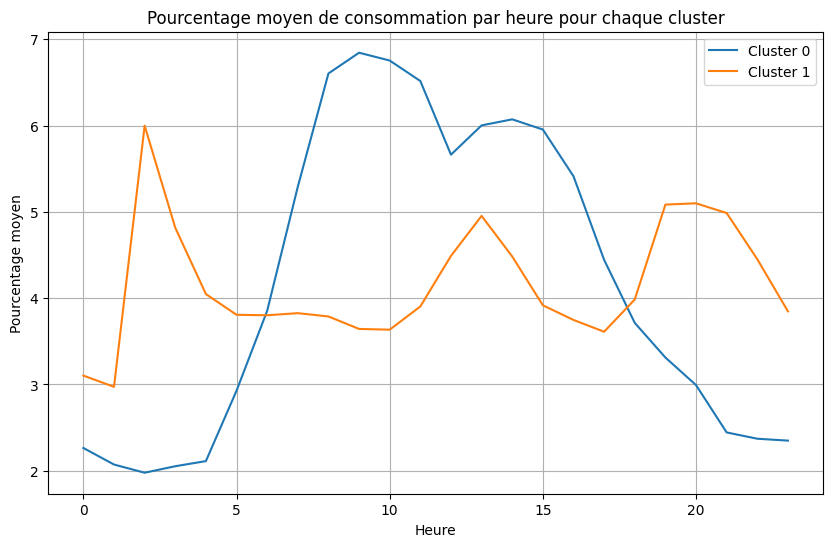

In [23]:
mean_percentage_by_cluster_transposed = mean_percentage_by_cluster.transpose()

plt.figure(figsize=(10, 6))

for cluster in mean_percentage_by_cluster_transposed.columns:
    plt.plot(mean_percentage_by_cluster_transposed.index, mean_percentage_by_cluster_transposed[cluster], label=f'Cluster {cluster}')

plt.title('Pourcentage moyen de consommation par heure pour chaque cluster')
plt.xlabel('Heure')
plt.ylabel('Pourcentage moyen')
plt.legend()
plt.grid(True)
plt.show()

Il y a une distinction significative dans les profils de consommation entre les deux clusters :

Le cluster 0 présente une augmentation marquée de la consommation en milieu de journée, en parallèle à une consommation plus faible pendant les heures creuses.
En revanche, le cluster 1 affiche une consommation plus constante tout au long de la journée, sans pic notable.

On peut voir ça en détail pour chaque client à part ci-dessous.

In [33]:
indices_0 = result[result['cluster'].isin([0])]
liste_indices_0=list(indices_0['index'])
indices_1 = result[result['cluster'].isin([1])]
liste_indices_1=list(indices_1['index'])


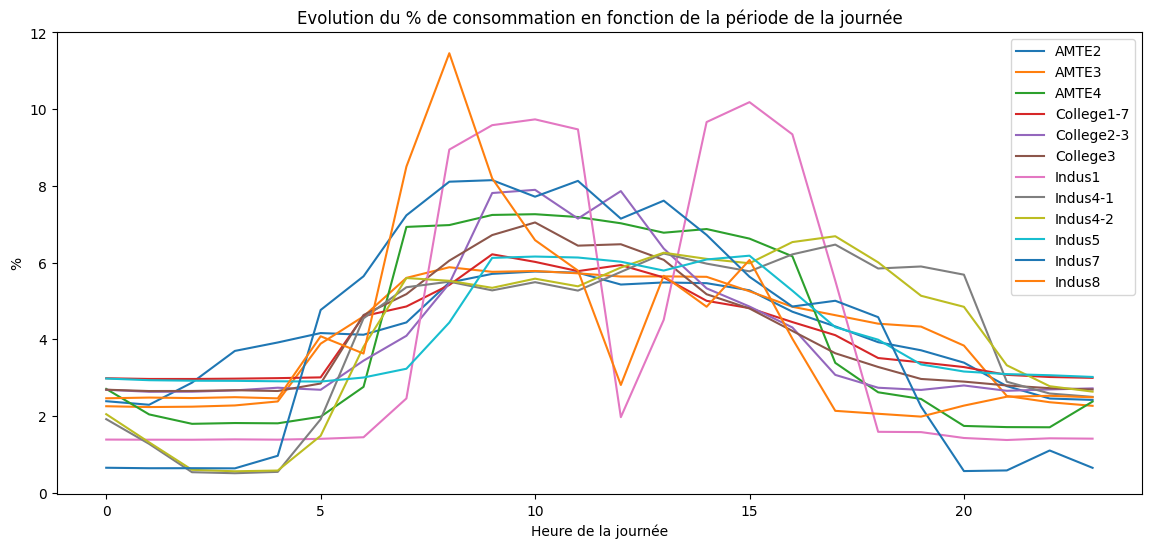

In [39]:
plt.figure(figsize=(14, 6))


for col in liste_indices_0 :
    plt.plot(df_percentage.index, df_percentage[col], label=col)

# Ajouter des étiquettes et une légende
plt.xlabel('Heure de la journée')
plt.ylabel('%')
plt.title('Evolution du % de consommation en fonction de la période de la journée cluster 0')
plt.legend()

# Afficher le graphique
plt.show()

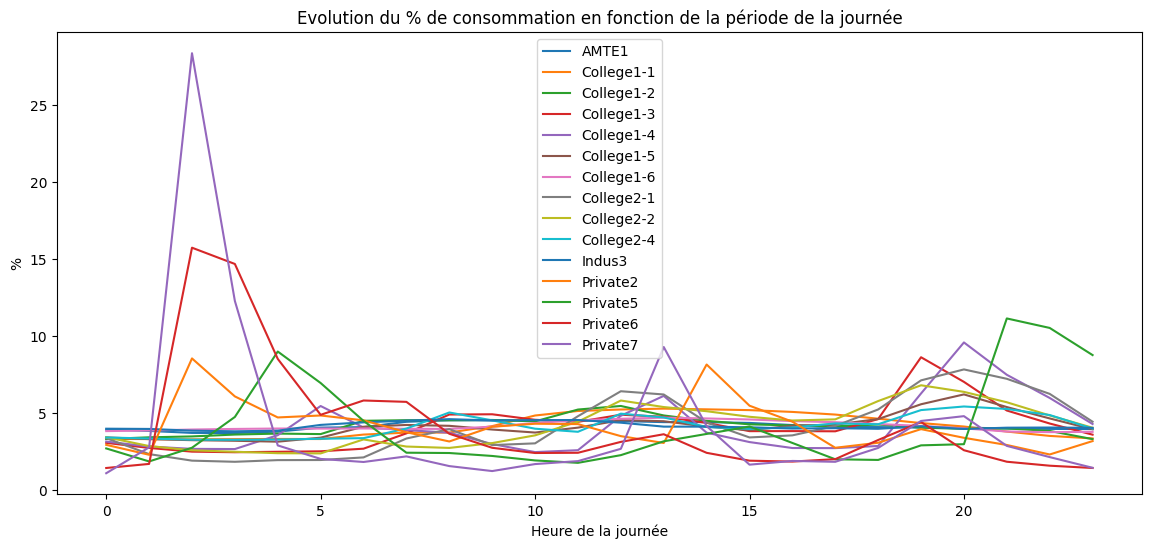

In [38]:
plt.figure(figsize=(14, 6))


for col in liste_indices_1 :
    plt.plot(df_percentage.index, df_percentage[col], label=col)

# Ajouter des étiquettes et une légende
plt.xlabel('Heure de la journée')
plt.ylabel('%')
plt.title('Evolution du % de consommation en fonction de la période de la journée cluster 1')
plt.legend()

# Afficher le graphique
plt.show()